In [3]:
### Import packages for preprocessing

import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

### Import packages to create absolute file path & make code independent of operating system

from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")

### Import packages to visualize data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Error loading stopwords: HTTP Error 500: Internal Server
[nltk_data]     Error
[nltk_data] Error loading wordnet: HTTP Error 500: Internal Server
[nltk_data]     Error
[nltk_data] Error loading punkt: HTTP Error 500: Internal Server Error
[nltk_data] Error loading averaged_perceptron_tagger: HTTP Error 500:
[nltk_data]     Internal Server Error


In [2]:
### Read in dataset

base_path = Path("__file__").parent

full_path = (base_path / "../../data/raw/stackoverflow_raw_sample.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

In [2]:
### Read in binary dataset

base_path = Path("__file__").parent
full_path = (base_path / "../data/raw/stackoverflow_raw_sample_binary.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

FileNotFoundError: [Errno 2] File /Users/HenriekeMax/Documents/Career_Development/GitHub/FrauenLoop_NLP_Project_2020/src/data/raw/stackoverflow_raw_sample_binary.csv does not exist: '/Users/HenriekeMax/Documents/Career_Development/GitHub/FrauenLoop_NLP_Project_2020/src/data/raw/stackoverflow_raw_sample_binary.csv'

In [12]:
stackoverflow.shape

(30000, 16)

In [13]:
stackoverflow_short = stackoverflow[:1000]

In [14]:
stackoverflow.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text,score_cat
0,0,1262768,1262768,0,57627956,57627956,How to avoid Bot repeating command in groups?,<p>I created a new Telegram Bot which maintain...,2,0,2019-08-23 14:05:29.463000+00:00,0.0,telegram-bot|python-telegram-bot,79,"<p>The bot only is replying message, not creat...",bad
1,1,584060,584060,-3,61469635,61469635,how to host Asp.net core web application..?,<p>I have more confusion with hosting my appli...,2,0,2020-04-27 22:38:03.737000+00:00,NaN,asp.net-core|shared-hosting|cloud-hosting,47,<p>If choose their windows cloud hosting platf...,bad
2,2,1593780,1593780,0,60330818,60330818,discord.ext.commands.errors.MissingRequiredArg...,<p>i would like make a command for set permiss...,2,0,2020-02-21 01:10:53.553000+00:00,NaN,discord.py|discord.py-rewrite,103,"<p>What you're doing right now, is <strong>req...",bad
3,3,877874,877874,0,58685674,58685674,JPA not saving to DB on WildFly 16,<p>After migrating from Wildfly-8.2.0 to Wildf...,1,1,2019-11-03 23:51:01.683000+00:00,NaN,jpa|jakarta-ee|persistence|jpa-2.1|wildfly-16,22,"<p>What was missing is to add the ""eclipselink...",bad
4,4,1811675,1811675,0,60358924,60358924,Conditionally rendering an array within an arr...,<p>I've tried many of the methods outlined by ...,1,5,2020-02-23 03:24:42.360000+00:00,NaN,javascript|html|reactjs,40,<p>You need to trigger a re-render. This is do...,bad


In [3]:
### Drop any columns from dataframe not holding useful information

stackoverflow = stackoverflow.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'question_id', 'question_id_check'])

In [4]:
### Print out variable types for overview

stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score           30000 non-null  int64  
 1   question_title  30000 non-null  object 
 2   question_text   30000 non-null  object 
 3   answer_count    30000 non-null  int64  
 4   comment_count   30000 non-null  int64  
 5   creation_date   30000 non-null  object 
 6   favorite_count  13254 non-null  float64
 7   tags            30000 non-null  object 
 8   view_count      30000 non-null  int64  
 9   answer_text     30000 non-null  object 
 10  score_cat       30000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
### Figure out how to deal with missing values for answer_text_clean, tags_clean and question_title_clean

stackoverflow.isna().any()

score             False
question_title    False
question_text     False
answer_count      False
comment_count     False
creation_date     False
favorite_count     True
tags              False
view_count        False
answer_text       False
score_cat         False
dtype: bool

In [6]:
### Drop "favorite_count" as it will not be used in analysis

stackoverflow = stackoverflow.drop(['favorite_count'] , axis=1)

In [7]:
stackoverflow.score_cat.value_counts()

great    10000
good     10000
bad      10000
Name: score_cat, dtype: int64

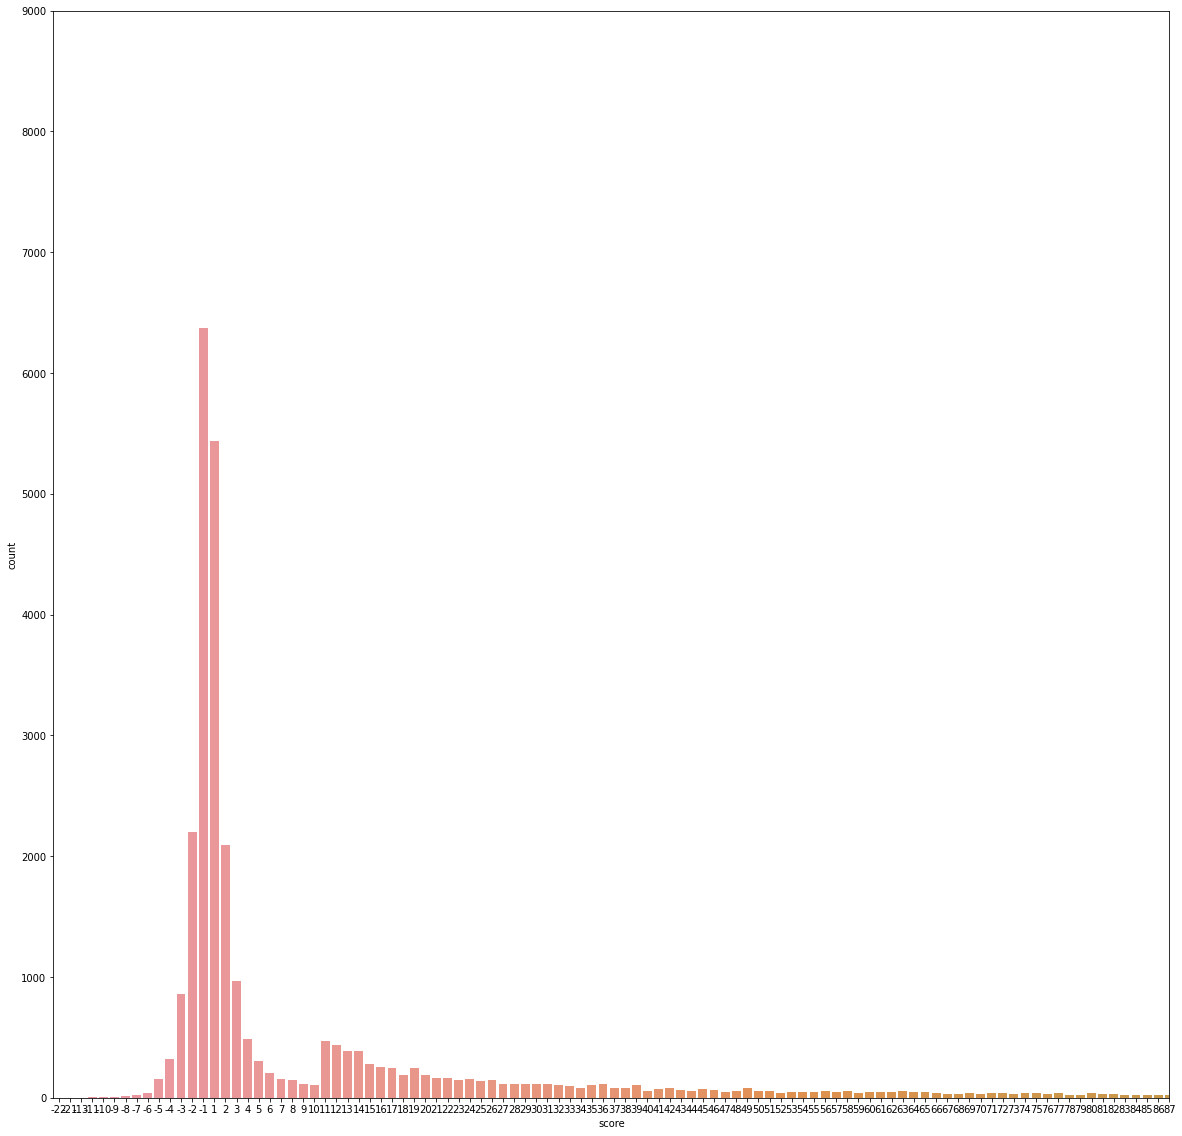

In [8]:
#### Histogram of distribution of outcome column "score"

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='score', data=stackoverflow)
plt.xlim(None, 100) 
plt.ylim(0, 9000) 
plt.show()

In [9]:
### Cleaning the text

stopwords_nltk = nltk.corpus.stopwords.words('english')

In [10]:
print(stopwords_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
### Create own list of stopwords building on nltk

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "can't", "'i'd", "it's", "I've"]

In [12]:
### Prepare lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
###  Define function that takes a whole sentence and outputs the lemmatized sentence

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [14]:
### Prepare list of punctuations to be excluded in cleaning process

punctuation = ['&', '%', '§', '/', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', ':', '_', '*', '|', ',', '+', ';', '@', '€', '$', '#', '==', '[',']', '{', '}', "`", '´', '=', "´´", '!', '°', '^', '--', "``", "''", '-', '"', "'", "?"]

In [15]:
### Write tailored preprocessing function to remove specific strings, code, stopwords and punctuation and to lemmatize words

def preprocessor(text_column):
    text_column = re.sub(r'<code>.*?</code>', ' ', text_column.lower())
    text_column = re.sub(r'<.*?>', ' ', text_column)
    text_column = re.sub(r'[( )]', ' ', text_column)
    ### Removing dots connecting words and at end of sentence
    text_column = " ".join(text_column.split("."))
    ### Removing backslash connecting words
    text_column = " ".join(text_column.split("\\"))
    ### Removing vertical slash connecting words
    text_column = " ".join(text_column.split("|"))
    ### Remove stopwords from sentences
    text_column = [w for w in text_column.split() if w not in stopwords]
    text_column = ' '.join(text_column)
    ### Clean each letter/token in a sentence
    token = [letter for letter in text_column if letter not in punctuation]
    text_column = ''.join(token)
    ### Lemmatize sentences
    text_column = lemmatize_sentence(text_column)
    ### Replace occurrences of single alphabet characters
    text_column = re.sub(r"\b[a-zA-Z]\b", "", text_column)
    return text_column

example_sentence = "<p> ´´HI myself 3945p0hfnds <p> n, <code> grnkgljhkge </code>I am singing. 'our' (testing) arbitrary & d lkögeaf_fewnefwl& can't c you're again tghghg.words.blub wildfly\modules\system\layers |tags|some more tags|blub"

preprocessor(example_sentence)

### TO DO: figure out how to remove unnecessary whitespace and quotation marks

'hi phfnds  sing our test arbitrary lkögeaffewnefwl  tghghg word blub wildfly module system layer tag tag blub'

In [16]:
### Separating target and text columns

excluded_cols = ['comment_count', 'creation_date', 'view_count', 'score', 'answer_count']
target_col = ['score_cat']
text_cols = [x for x in stackoverflow if x not in target_col + excluded_cols]

In [17]:
print(text_cols)

['question_title', 'question_text', 'tags', 'answer_text']


In [18]:
### Applying cleaning / preprocessing to all text columns

for var_name in text_cols:
    new_var = "%s_%s" % (var_name, "clean")
    stackoverflow[new_var] = stackoverflow[var_name].apply(preprocessor)

In [19]:
pd.set_option('display.max_colwidth', -1)

In [20]:
stackoverflow.head(20)

,score,question_title,question_text,answer_count,comment_count,creation_date,tags,view_count,answer_text,score_cat,question_title_clean,question_text_clean,tags_clean,answer_text_clean
0,-1,Laravel email template styling,"<p>Css is not working in email templates so any Emails for my clients look ugly, After a lot of googling I have seen solutions on Laravel css inline but I don't know how to use them,</p>\n\n<p>Any solutions so as to help my css load </p>\n\n<pre><code>@extends('layouts.master')\n@section('title')\n XXXX | WELCOME\n@endsection``\n@section('body')\n&lt;div class=""page text-center""&gt;\n\n &lt;!-- Page Head--&gt;\n &lt;!-- Page Contents--&gt;\n &lt;main class=""page-content""&gt;\n &lt;!-- Search Engine--&gt;\n &lt;section class=""section-98 section-sm-110""&gt;\n &lt;div class=""shell""&gt;\n &lt;div class=""offset-sm-top-66""&gt;\n &lt;center&gt;\n &lt;img class='img-responsive' style='margin-top: -20px;margin-left: -5px;' width='329' height='67' src=""{{URL::to('/images/icon1.png')}}"" alt=''/&gt;\n &lt;/center&gt;\n &lt;!-- Responsive-tabs--&gt;\n &lt;div data-type=""horizontal"" class=""responsive-tabs responsive-tabs-classic""&gt;\n &lt;p class=""text-center alert alert-info""&gt;Welcome to XXXX &lt;br&gt; please verify your account by entering digits sent via sms.&lt;/p&gt;\n &lt;/div&gt;\n &lt;/div&gt;\n &lt;/div&gt;\n &lt;/section&gt;\n &lt;/main&gt;\n&lt;/div&gt;\n@endsection\n</code></pre>\n\n<p>Above is the sample template</p>\n\n<p>Thank you.</p>",3,4,2018-01-11 08:00:33.623000+00:00,php|laravel,3230,"<p>Use markdown templates\n<a href=""https://laravel.com/docs/5.8/mail#markdown-mailables"" rel=""nofollow noreferrer"">https://laravel.com/docs/5.8/mail#markdown-mailables</a></p>\n\n<p>Create a view:</p>\n\n<pre><code>php artisan make:mail MailableClass --markdown=markdown_view\n</code></pre>\n\n<p>Use markdown( ) method to specify your view:</p>\n\n<pre><code>#/app/Mail/MailableClass.php\n public function build() {\n return $this-&gt;from(…)\n -&gt;markdown('view_name');\n }\n</code></pre>\n\n<p>Also you can change the default theme by:</p>\n\n<pre><code>php artisan vendor:publish --tag=laravel-mail\n</code></pre>\n\n<p>Your default styles will be located in /resources/views/vendor/mail/html/themes/default.css</p>",bad,laravel email template styling,cs work email template email client look ugly lot google see solution laravel css inline know use them solution help css load extends layouts master section title xxxx welcome endsection section body ltdiv classpage textcentergt lt page headgt lt page contentsgt ltmain classpagecontentgt lt search enginegt ltsection classsection sectionsmgt ltdiv classshellgt ltdiv classoffsetsmtopgt ltcentergt ltimg classimgresponsive stylemargintop pxmarginleft px width height srcurlto imagesicon png altgt ltcentergt lt responsivetabsgt ltdiv datatypehorizontal classresponsivetabs responsivetabsclassicgt ltp classtextcenter alert alertinfogtwelcome xxxx ltbrgt please verify account enter digit send via sm ltpgt ltdivgt ltdivgt ltdivgt ltsectiongt ltmaingt ltdivgt endsection sample template thank,php laravel,use markdown template httpslaravel comdocs mailmarkdownmailables create view php artisan makemail mailableclass markdownmarkdownview use markdown method specify view appmailmailableclass php public function build return thisgtfrom … gtmarkdown viewname also change default theme by php artisan vendorpublish taglaravelmail default style locate resourcesviewsvendormailhtmlthemesdefault cs
1,-1,Only show a certain count of textboxes in vb.net,"<p>I'm trying to make several TextBoxes visible and invisible, depending on the number in another textbox. In Fact I have 14(TextBox1, TextBox2, ...), this is my code so far:</p>\n\n<pre><code>Dim s As Integer = 0\n\nWhile s &gt; 14\n s += 1\n Dim txtBox As String = ""TextBox"" &amp; CStr(s)\n CObj(txtBox).Visible = False\nEnd While\n\n\n\n\nIf txtBoxHowmany.Text = """" Then\n\n Else\n Dim s As Integer = 0\n\n While s &gt; txtBo

In [21]:
### Check again for missing values

stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   score                 30000 non-null  int64 
 1   question_title        30000 non-null  object
 2   question_text         30000 non-null  object
 3   answer_count          30000 non-null  int64 
 4   comment_count         30000 non-null  int64 
 5   creation_date         30000 non-null  object
 6   tags                  30000 non-null  object
 7   view_count            30000 non-null  int64 
 8   answer_text           30000 non-null  object
 9   score_cat             30000 non-null  object
 10  question_title_clean  30000 non-null  object
 11  question_text_clean   30000 non-null  object
 12  tags_clean            30000 non-null  object
 13  answer_text_clean     30000 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.2+ MB


In [ ]:
### Drop all observations / rows with any missing values

stackoverflow = stackoverflow.dropna()

In [22]:
# Make categorical score labels numeric

stackoverflow['score_cat'] = stackoverflow['score_cat'].astype('category')
stackoverflow['score_cat'] = stackoverflow.score_cat.cat.codes

In [23]:
### Save preprocessed data to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../../data/processed/stackoverflow_preprocessed.csv").resolve()
stackoverflow.to_csv(os.path.join(full_path))